![Universidad Central](https://www.ucentral.edu.co/sites/default/files/inline-images/identificadores-Centrados_en_ti_logo-h.png)

**Segmentación de clientes credito vehiculo**

**Marketing Analytics** <br>

Profesor: Hugo Alexander Martinez <br>
Facultad de Ingeniería y Ciencias Básicas <br>
Universidad Central <br>

Daniel Mauricio Cardenas<br>


# Metodologia de mineria de Datos - CRISP DM

## Comprensión del negocio.

- **Contexto**

Según Segura, F. E. P., y Ayala, J. C. P. (2005), el crédito para vehículos en Colombia se originó en la década de 1970, impulsado principalmente por la creación de ensambladoras que generaron empleo en sectores populares. Este desarrollo contribuyó al crecimiento económico y a la creciente necesidad de adquirir vehículos. Las entidades financieras vieron en esta situación una oportunidad de negocio debido a la alta demanda, ofreciendo créditos caracterizados por su alto valor, tasas de interés elevadas y garantías respaldadas por el mismo activo, además de contar con uno o varios codeudores. Con el tiempo, los bancos comenzaron a crear líneas de crédito especializadas para este sector.

Para 2024, la oferta de créditos para la adquisición de vehículos en Colombia es bastante amplia, y las tasas de interés varían según el tipo de vehículo, ya sea nuevo o usado, así como si es híbrido, eléctrico o de combustión fósil.

![Tasas de interes vehiculos](https://img.lalr.co/cms/2024/04/08165245/web_900_finanzas_autos_p21.jpg) <br>
[Fuente](https://www.larepublica.co/finanzas/estas-son-las-tasas-de-interes-que-ofrecen-las-entidades-para-los-creditos-de-vehiculos-3836450)

La financiación puede alcanzar hasta el 100% del valor del vehículo, con un plazo máximo de hasta 7 años (84 meses). Actualmente, Bancolombia ofrece la tasa más baja del mercado para la adquisición de vehículos eléctricos, con un 14.71% E.A., seguida de Davivienda con un 15.12% E.A. En términos generales, las tasas en el mercado rondan un promedio del 17% E.A

De acuerdo con el DANE, en el primer trimestre de 

- **Objetivos del negocio**





## Analisis Exploratorio de los datos.

A continuación se realiza el analisis exploratorio de los datos, de acuerdo con el cuestionario **Crédito Vehículo - Potenciales**

In [4]:
from utils import *

In [5]:
#Cargar el dataset
url = "https://github.com/LordOnion88/MAD/raw/refs/heads/main/Marketing%20Analytics/Clustering/MAVEHICULO%20POTENCIALF.xlsx"

data = pd.read_excel(url, sheet_name='TEXTOS')
data.head(5)


,REGISTRO,CIUDAD,F1,F2,F6,F7,P1_1,P1_2,P1_3,P2,...,P64_2,P64A_OTRO,P64B_OTRO,P64C_OTRO,P64D_OTRO,P64E_OTRO,P64F_OTRO,D1,D2,D3
0,71,Bogotá,Si,Si,Mayor 60 años,Estrato Medio (3),-,NaN,NaN,-,...,NaN,-,-,-,-,-,-,Masculino,Independiente,Primaria completa
1,68,Bogotá,No,Si,25a 39 años,Estrato Medio (3),Mayor confort para transportarse / transportar...,NaN,NaN,Con financiamiento,...,NaN,-,-,-,-,-,-,Femenino,Empleado tiempo completo,Universidad incompleta
2,75,Bogotá,Si,Si,25a 39 años,Estrato Medio Típico (4),-,NaN,NaN,-,...,NaN,-,-,-,-,-,-,Femenino,Empleado tiempo completo,Universidad completa
3,77,Bogotá,No,Si,25a 39 años,Estrato Medio (3),Por superación personal,NaN,NaN,Con recursos propios,...,NaN,-,-,-,-,-,-,Masculino,Empleado tiempo completo,Técnico / tecnólogo
4,76,Bogotá,Si,Si,40 a 60 años,Estrato Medio (3),-,NaN,NaN,-,...,NaN,-,-,-,-,-,-,Masculino,Empleado tiempo completo,Postgrado


In [6]:
columnasAED = ['CIUDAD', 'F6','F7','D1','D2','D3']

data_AED = data.copy()
data_AED = data_AED[columnasAED]
data_AED = data_AED.rename(columns={'CIUDAD':'Ciudad','F6':'Rango de edad','F7':'Estrato','D1':'Genero','D2':'Ocupación','D3':'Nivel de estudios'})
data_AED

,Ciudad,Rango de edad,Estrato,Genero,Ocupación,Nivel de estudios
0,Bogotá,Mayor 60 años,Estrato Medio (3),Masculino,Independiente,Primaria completa
1,Bogotá,25a 39 años,Estrato Medio (3),Femenino,Empleado tiempo completo,Universidad incompleta
2,Bogotá,25a 39 años,Estrato Medio Típico (4),Femenino,Empleado tiempo completo,Universidad completa
3,Bogotá,25a 39 años,Estrato Medio (3),Masculino,Empleado tiempo completo,Técnico / tecnólogo
4,Bogotá,40 a 60 años,Estrato Medio (3),Masculino,Empleado tiempo completo,Postgrado
...,...,...,...,...,...,...
120,Medellín,25a 39 años,Estrato Medio (3),Masculino,Independiente,Técnico / tecnólogo
121,Pasto,25a 39 años,Estrato Medio Típico (4),Masculino,Empleado tiempo completo,Universidad completa
122,Pasto,25a 39 años,Estrato Medio (3),Masculino,Independiente,Bachillerato completo
123,Pasto,40 a 60 años,Estrato Medio (3),Masculino,Independiente,Técnico / tecnólogo


In [7]:
data_AED.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Ciudad             125 non-null    object
 1   Rango de edad      125 non-null    object
 2   Estrato            125 non-null    object
 3   Genero             125 non-null    object
 4   Ocupación          125 non-null    object
 5   Nivel de estudios  125 non-null    object
dtypes: object(6)
memory usage: 6.0+ KB


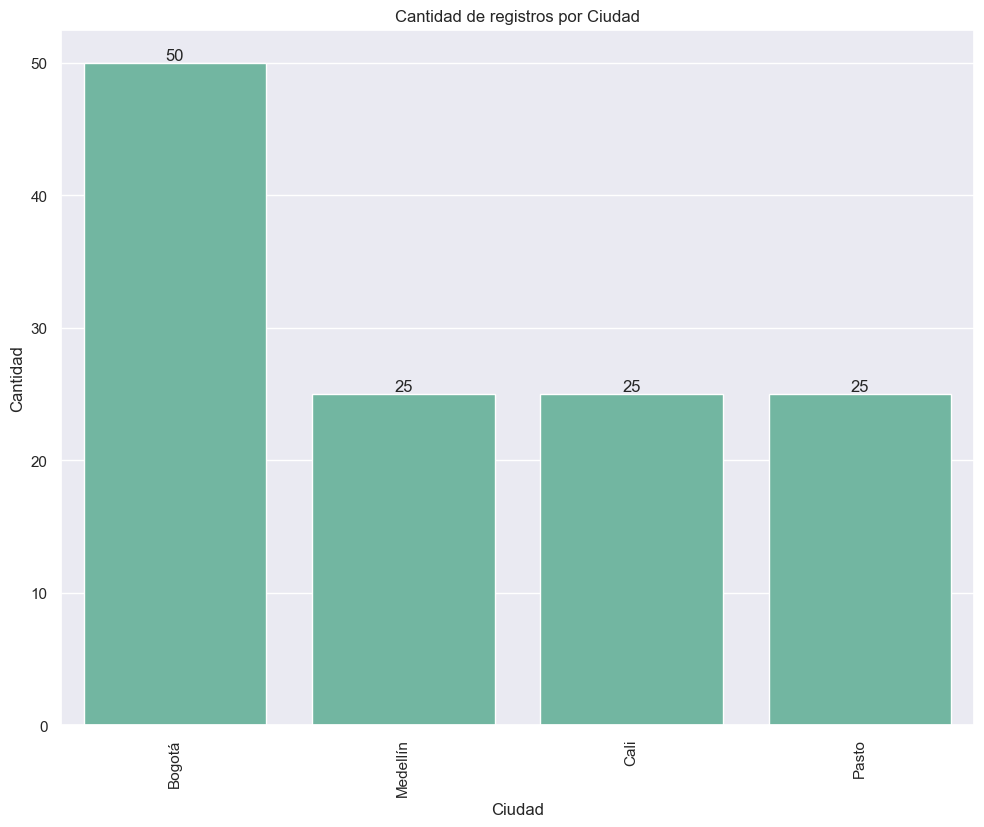

In [8]:
Graficar_categoricas('Ciudad',data_AED)

Describiendo la población que participo en la encuesta,podemos decir que se concentró en Bogotá ya que tiene el 40% de participación; para las demas ciudades tienen una participación del 20% respectivamente, por lo que podemos concluir que la campaña se debe enfocar en mayor medida a los clientes que se encuentren en Bogotá.

<Figure size 1000x800 with 0 Axes>

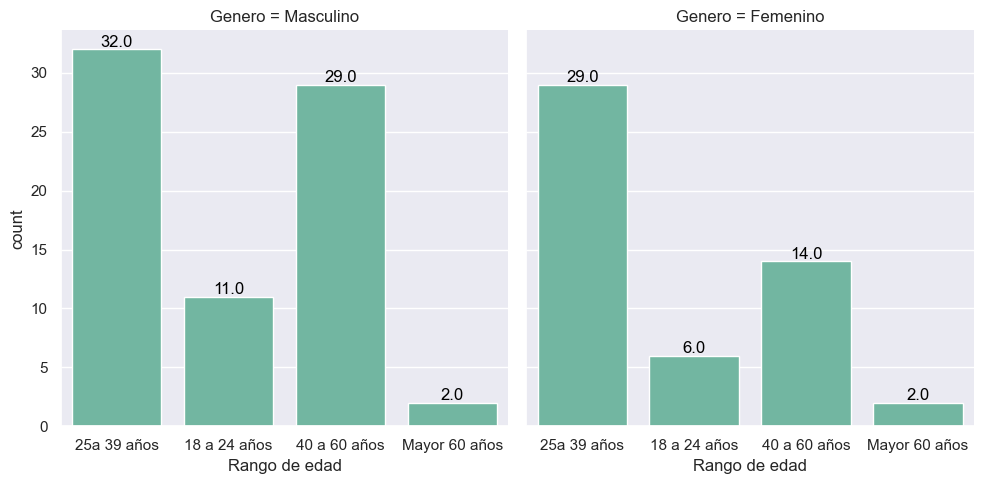

 Masculino: 74
 Femenino: 51


In [9]:
plt.figure(figsize=(10,8))
g = sns.FacetGrid(data_AED,col='Genero', margin_titles=True,height=5)
g.map(sns.countplot,'Rango de edad', order = {'18 a 24 años','25a 39 años','40 a 60 años','Mayor 60 años'})
for ax in g.axes.flat:
    # Añadir texto a cada barra
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    fontsize=12, color='black', 
                    xytext=(0, 5), textcoords='offset points')

g.tight_layout()
plt.show()

c_genero = data_AED['Genero'].value_counts()
print(f" Masculino: {c_genero.get('Masculino',0)}")
print(f" Femenino: {c_genero.get('Femenino', 0)}")

De los encuestados, encontramos que 74 se identifican como masculinos, y 51 como femenino, en ambos casos el rango de edad que sobresale es el de 25 a 39 años, seguido del rango de 40 a 60 años; lo cual es acorde con la población activa en Colombia y que tiene mayor participación de operaciones de credito (González, A. B. 2023
), queda por demostrar si en este mismo grupo poblacional, es directamente proporcional con el interes en adquirir un vehiculo.

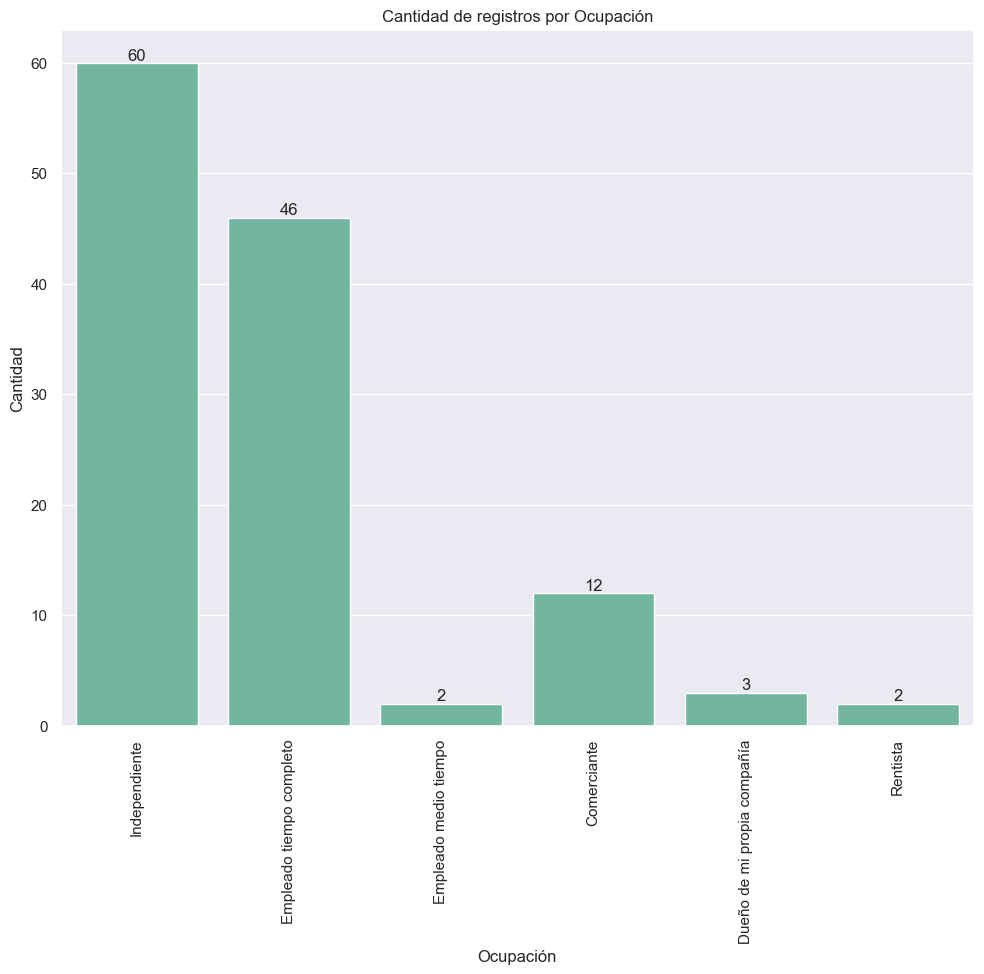

In [10]:
Graficar_categoricas('Ocupación',data_AED)

60 de los encuestados, son independientes, 46 son empleados a tiempo completo.

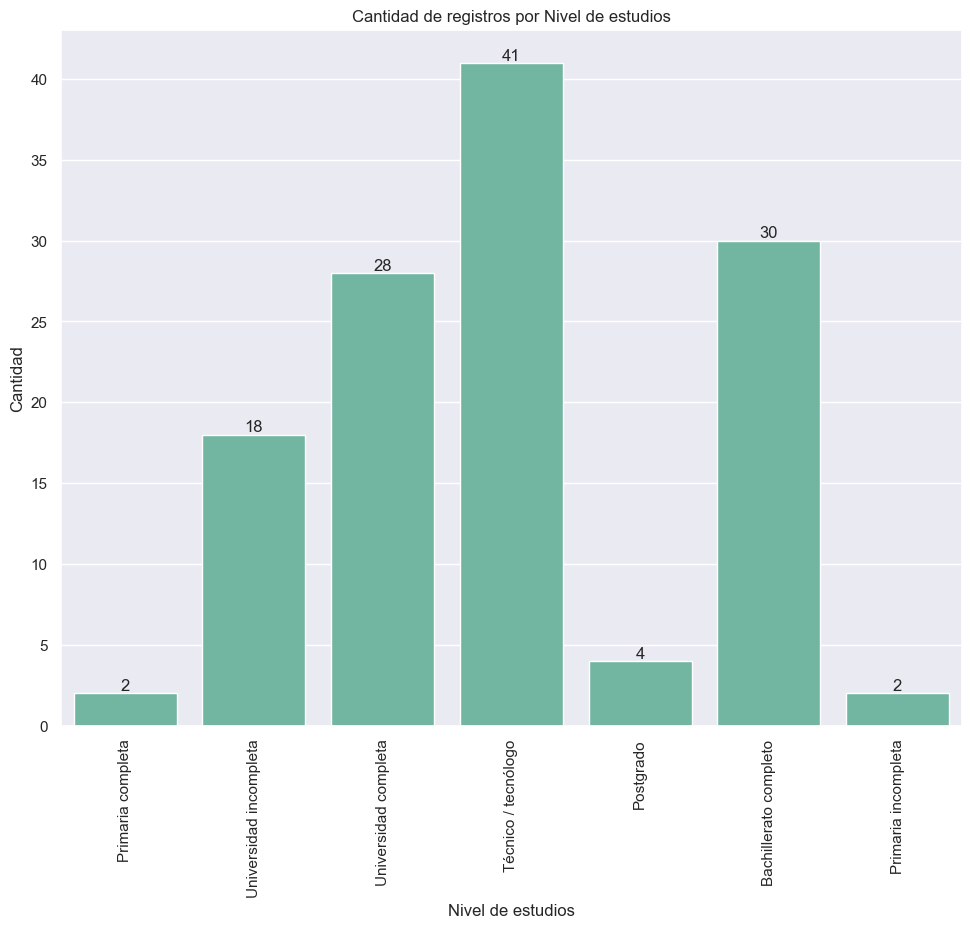

In [12]:
Graficar_categoricas('Nivel de estudios', data_AED)

En cuanto a nivel de estudios, la población se concentran en encuestados con un grado de técnico o tecnólogo.

## Clustering

In [14]:
data_Cl = pd.read_excel(url,sheet_name='CODIGOS')
data_Cl.head(10)

,REGISTRO,CIUDAD,F1,F2,F6,F7,P1_1,P1_2,P1_3,P2,...,P64_2,P64A_OTRO,P64B_OTRO,P64C_OTRO,P64D_OTRO,P64E_OTRO,P64F_OTRO,D1,D2,D3
0,71,1,1,1,4,3,-,NaN,NaN,-,...,NaN,-,-,-,-,-,-,2,3,2
1,68,1,2,1,2,3,3,NaN,NaN,2,...,NaN,-,-,-,-,-,-,1,1,7
2,75,1,1,1,2,4,-,NaN,NaN,-,...,NaN,-,-,-,-,-,-,1,1,6
3,77,1,2,1,2,3,1,NaN,NaN,1,...,NaN,-,-,-,-,-,-,2,1,5
4,76,1,1,1,3,3,-,NaN,NaN,-,...,NaN,-,-,-,-,-,-,2,1,8
5,60,1,2,1,3,3,2,3.0,1.0,2,...,NaN,-,-,-,-,-,-,1,1,4
6,57,1,1,1,3,3,-,NaN,NaN,-,...,NaN,-,-,-,-,-,-,1,2,1
7,62,1,2,1,2,3,1,NaN,NaN,1,...,NaN,-,-,-,-,-,-,2,3,6
8,67,1,1,1,2,3,-,NaN,NaN,-,...,NaN,-,-,-,-,-,-,2,3,5
9,65,1,2,1,3,3,2,NaN,NaN,1,...,NaN,-,-,-,-,-,-,2,3,7


In [15]:
data_Cl_nulos = data_Cl.isnull().sum()
print(data_Cl_nulos)

REGISTRO     0
CIUDAD       0
F1           0
F2           0
F6           0
            ..
P64E_OTRO    0
P64F_OTRO    0
D1           0
D2           0
D3           0
Length: 307, dtype: int64


In [16]:
data_Cl.fillna(1,inplace=True)
data_Cl.head(10)

,REGISTRO,CIUDAD,F1,F2,F6,F7,P1_1,P1_2,P1_3,P2,...,P64_2,P64A_OTRO,P64B_OTRO,P64C_OTRO,P64D_OTRO,P64E_OTRO,P64F_OTRO,D1,D2,D3
0,71,1,1,1,4,3,-,1.0,1.0,-,...,1.0,-,-,-,-,-,-,2,3,2
1,68,1,2,1,2,3,3,1.0,1.0,2,...,1.0,-,-,-,-,-,-,1,1,7
2,75,1,1,1,2,4,-,1.0,1.0,-,...,1.0,-,-,-,-,-,-,1,1,6
3,77,1,2,1,2,3,1,1.0,1.0,1,...,1.0,-,-,-,-,-,-,2,1,5
4,76,1,1,1,3,3,-,1.0,1.0,-,...,1.0,-,-,-,-,-,-,2,1,8
5,60,1,2,1,3,3,2,3.0,1.0,2,...,1.0,-,-,-,-,-,-,1,1,4
6,57,1,1,1,3,3,-,1.0,1.0,-,...,1.0,-,-,-,-,-,-,1,2,1
7,62,1,2,1,2,3,1,1.0,1.0,1,...,1.0,-,-,-,-,-,-,2,3,6
8,67,1,1,1,2,3,-,1.0,1.0,-,...,1.0,-,-,-,-,-,-,2,3,5
9,65,1,2,1,3,3,2,1.0,1.0,1,...,1.0,-,-,-,-,-,-,2,3,7


## Referencias

`SEGURA, F. E. P., & AYALA, J. C. P. ORIGINACION DE CREDITOS DE VEHICULOS PARTICULARES EN COLOMBIA-NEGOCIO PARA REDISEÑAR.`

`González, A. B. (2023, February 24). Menores de 21 años representan el 16,4% de las operaciones crediticias en Colombia. Diario La República; Diario La republica. https://www.larepublica.co/finanzas-personales/menores-de-21-anos-representan-el-16-4-de-las-operaciones-crediticias-en-colombia-3553421`